In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_examination.csv', index_col=0)

# Add 'overweight' column
df['overweight'] = round(df['weight'] / df['height'] ** 2 * 10_000, 0)
df['overweight'] = df['overweight'].astype(int)

df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  overweight   70000 non-null  int32  
dtypes: float64(1), int32(1), int64(11)
memory usage: 7.2 MB


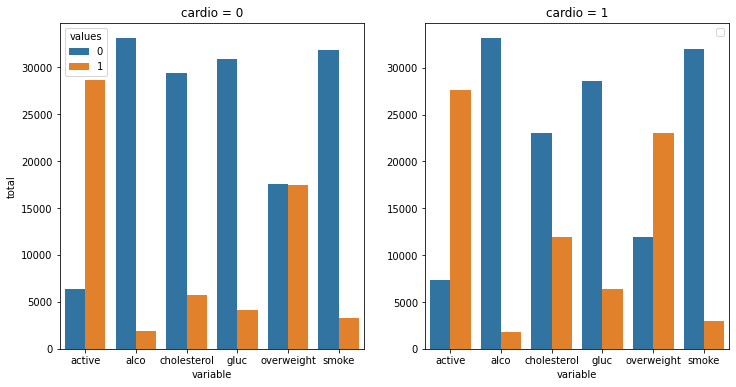

In [4]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
cats = df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke', 'cardio']]
df_cat = cats.melt(id_vars='cardio', value_vars=cats.columns, var_name='variable', value_name='values')

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
cardio_zero = df_cat[df_cat['cardio'] == 0]
cardio_one = df_cat[df_cat['cardio'] == 1]

# Draw the catplot with 'sns.catplot()'
fig, ((ax0, ax1)) = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

sns.countplot(x='variable', hue='values', data=cardio_zero, ax=ax0)
sns.countplot(x='variable', hue='values', data=cardio_one, ax=ax1)

ax0.set(title='cardio = 0', ylabel='total')
ax1.set(title='cardio = 1', ylabel=None)
ax1.legend([])

# Do not modify the next two lines
fig.savefig('catplot.jpg', bbox_inches='tight')

AttributeError: 'AxesSubplot' object has no attribute 'set_axis_labels'

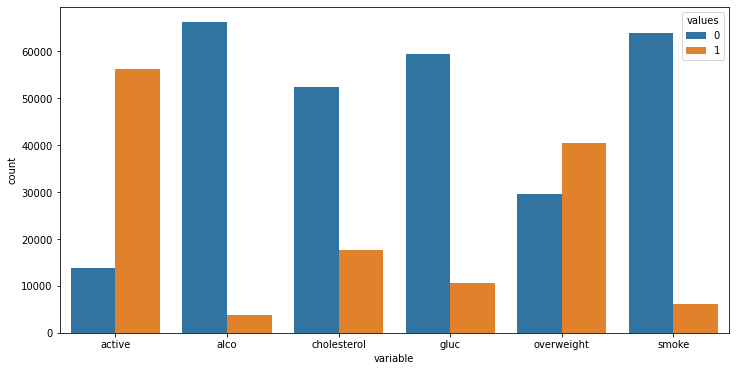

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


## Heatmap

In [157]:
len(df.index)

70000

In [ ]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
          & (df['height'] >= df['height'].quantile(0.025)) 
          & (df['height'] <= df['height'].quantile(0.975))
          & (df['weight'] >= df['weight'].quantile(0.025))
          & (df['weight'] <= df['weight'].quantile(0.975))]

In [147]:
df_heat.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [148]:
len(df_heat.index)

63259

In [175]:
df_corr = df_heat.corr()
df_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
age,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.093908
gender,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.060552
height,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.158893
weight,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.677277
ap_hi,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.016385
ap_lo,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.177592
cholesterol,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.134916
gluc,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.094471
smoke,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.008765
alco,-0.026970,0.168637,0.089785,0.059917,0.000769,0.033042,0.038446,0.014297,0.341200,1.000000,0.025847,-0.011088,0.022227


In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

<AxesSubplot:>

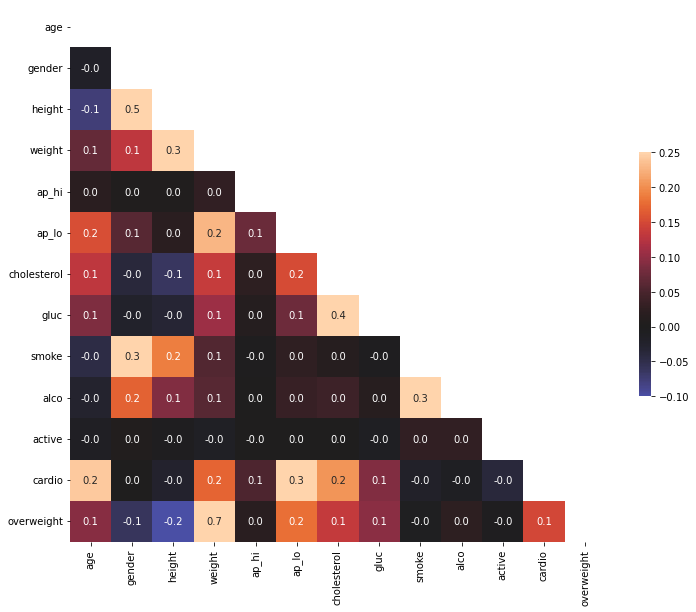

In [265]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# plot heatmap
sns.heatmap(df_corr, mask=mask, center=0, annot=True, square=True, fmt=".1f",
            vmin=-.1, vmax=.25, cbar_kws={"shrink": .45}, ax=ax)

# yticks
# plt.yticks(rotation=0)